In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 97% 64.0M/66.0M [00:03<00:00, 25.1MB/s]
100% 66.0M/66.0M [00:03<00:00, 17.5MB/s]


In [ ]:
!unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
import pandas as pd
df=pd.read_csv("/content/creditcard.csv")

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


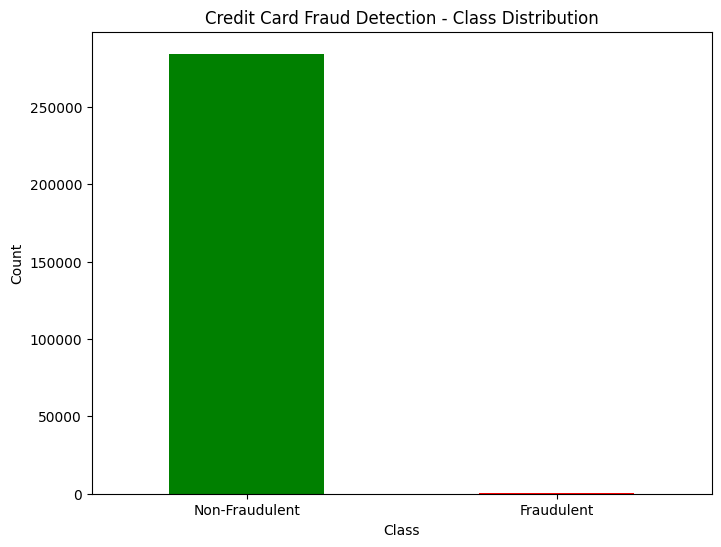

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
class_counts = df['Class'].value_counts()
class_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Credit Card Fraud Detection - Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0, ticks=[0, 1], labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Assuming your DataFrame is named 'df'
# Features (X) are all columns except 'Class'
# Target variable (y) is 'Class'
X = df.drop('Class', axis=1)
y = df['Class']

# Use MinMaxScaler for normalization
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training (80%) and temporary set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Split the temporary set into validation (50%) and final test set (50%)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Display the shapes of the sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (113922, 30) (113922,)
Validation set shape: (85443, 30) (85443,)
Test set shape: (85442, 30) (85442,)


In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

# Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPooling1D, Dropout, Flatten, Dense

model = Sequential()

# Conv1D Layer 1
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

# BatchNormalization 1
model.add(BatchNormalization())

# MaxPool1D 1
model.add(MaxPooling1D(pool_size=2))

# Dropout 1
model.add(Dropout(rate=0.2))

# Conv1D Layer 2
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))

# BatchNormalization 2
model.add(BatchNormalization())

# MaxPool1D 2
model.add(MaxPooling1D(pool_size=2))

# Dropout 2
model.add(Dropout(rate=0.5))

# Flatten
model.add(Flatten())

# Dense 1
model.add(Dense(units=64, activation='relu'))

# Dropout 3
model.add(Dropout(rate=0.5))

# Dense 2
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Assuming you have training data (X_train, y_train) and validation data (X_val, y_val)
epochs = 46

# Train the model
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    validation_data=(X_val, y_val))  # Adjust verbose as needed (0: silent, 1: progress bar, 2: one line per epoch)

Epoch 1/46
3561/3561 [==============================] - 49s 11ms/step - loss: 0.0184 - accuracy: 0.9956 - val_loss: 0.0038 - val_accuracy: 0.9992
Epoch 2/46
3561/3561 [==============================] - 40s 11ms/step - loss: 0.0056 - accuracy: 0.9990 - val_loss: 0.0042 - val_accuracy: 0.9994
Epoch 3/46
3561/3561 [==============================] - 34s 9ms/step - loss: 0.0049 - accuracy: 0.9991 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 4/46
3561/3561 [==============================] - 31s 9ms/step - loss: 0.0045 - accuracy: 0.9992 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 5/46
3561/3561 [==============================] - 30s 8ms/step - loss: 0.0043 - accuracy: 0.9992 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 6/46
3561/3561 [==============================] - 34s 10ms/step - loss: 0.0040 - accuracy: 0.9992 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 7/46
3561/3561 [==============================] - 30s 8ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0038 - val

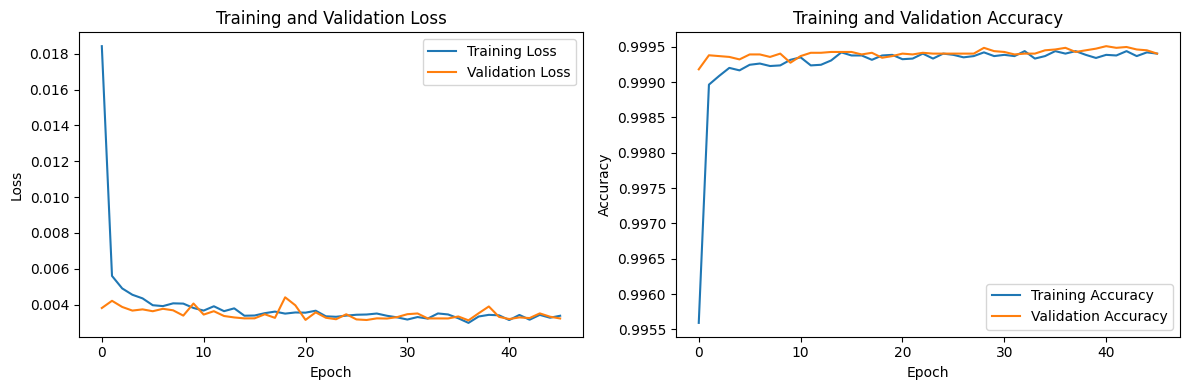

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and have the 'history' object
# history = model.fit(X_train_resampled, y_train_resampled, epochs=epochs, validation_data=(X_val, y_val))

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


2671/2671 [==============================] - 6s 2ms/step


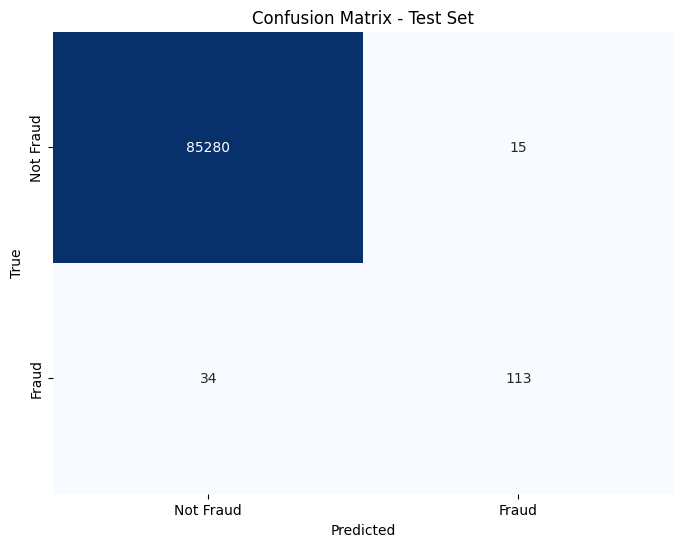

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have trained your model and have the 'model' object
# model.fit(X_train_resampled, y_train_resampled, epochs=epochs, validation_data=(X_val, y_val))

# Assuming you have X_test and y_test
# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.77      0.82       147

    accuracy                           1.00     85442
   macro avg       0.94      0.88      0.91     85442
weighted avg       1.00      1.00      1.00     85442



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_test and y_pred are your true labels and predicted labels, respectively

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.8828125
Recall: 0.7687074829931972
F1-score: 0.8218181818181819


# Using ADASYN without libarary (paper)

In [ ]:

import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.utils import check_array, check_random_state
from collections import Counter


class ADASYN(object):
    def __init__(self, ratio=0.5, imb_threshold=0.5, k=5, random_state=None, verbose=True):
        self.ratio = ratio
        self.imb_threshold = imb_threshold
        self.k = k
        self.random_state = random_state
        self.verbose = verbose
        self.clstats = {}
        self.num_new = 0
        self.index_new = []

    def fit(self, X, y):
        self.X = check_array(X)
        self.y = np.array(y, dtype=np.int64)
        self.random_state_ = check_random_state(self.random_state)
        self.unique_classes_ = set(self.y)
        self.clstats = Counter(self.y)
        self.maj_class_ = max(self.clstats, key=self.clstats.get)

        if self.verbose:
            print(f'Majority class is {self.maj_class_} and total number of classes is {len(self.unique_classes_)}')

    def transform(self, X, y):
        self.new_X, self.new_y = self.oversample()

    def fit_transform(self, X, y):
        self.fit(X, y)
        self.new_X, self.new_y = self.oversample()
        self.new_X = np.concatenate((self.new_X, self.X), axis=0)
        self.new_y = np.concatenate((self.new_y, self.y), axis=0)
        return self.new_X, self.new_y

    def generate_samples(self, x, knns, knnLabels, cl):
        new_data = []
        new_labels = []

        for ind, elem in enumerate(x):
            min_knns = [ele for index, ele in enumerate(knns[ind][1:-1]) if knnLabels[ind][index + 1] == cl]

            if not min_knns:
                continue

            for _ in range(int(self.gi[ind])):
                randi = self.random_state_.random_integers(0, len(min_knns) - 1)
                l = self.random_state_.random_sample()
                si = self.X[elem] + (self.X[min_knns[randi]] - self.X[elem]) * l

                new_data.append(si)
                new_labels.append(self.y[elem])
                self.num_new += 1

        return np.asarray(new_data), np.asarray(new_labels)

    def oversample(self):
        try:
            self.unique_classes_ = self.unique_classes_
        except AttributeError:
            raise RuntimeError("You need to fit() before applying transform(), or simply fit_transform()")

        int_X = np.zeros([1, self.X.shape[1]])
        int_y = np.zeros([1])

        for cl in self.unique_classes_:
            imb_degree = self.clstats[cl] / self.clstats[self.maj_class_]

            if imb_degree > self.imb_threshold:
                if self.verbose:
                    print(f'Class {cl} is within imbalance threshold')
            else:
                self.G = (self.clstats[self.maj_class_] - self.clstats[cl]) * self.ratio
                self.nearest_neighbors_ = NearestNeighbors(n_neighbors=self.k + 1)
                self.nearest_neighbors_.fit(self.X)
                minx = [ind for ind, exam in enumerate(self.X) if self.y[ind] == cl]
                knn = self.nearest_neighbors_.kneighbors(self.X[minx], return_distance=False)
                knnLabels = self.y[knn.ravel()].reshape(knn.shape)
                tempdi = [Counter(i) for i in knnLabels]
                self.ri = np.array([(sum(i.values()) - i[cl]) / float(self.k) for i in tempdi])

                if np.sum(self.ri):
                    self.ri = self.ri / np.sum(self.ri)

                self.gi = np.rint(self.ri * self.G)
                inter_X, inter_y = self.generate_samples(minx, knn, knnLabels, cl)

                if len(inter_X):
                    int_X = np.concatenate((int_X, inter_X), axis=0)
                if len(inter_y):
                    int_y = np.concatenate((int_y, inter_y), axis=0)

        self.index_new = list(range(self.num_new))
        return int_X[1:], int_y[1:]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Use ADASYN to oversample the minority class in the training set
X = df.drop('Class', axis=1)
y = df['Class']

# Use MinMaxScaler for normalization
print("Number of samples in each class before balancing:")
print(y.value_counts())

adasyn = ADASYN(ratio=6.5)
X, y = adasyn.fit_transform(X, y)
# Split the data into training (80%) and temporary set (20%)

print("\nNumber of samples in each class after balancing:")
unique_values, counts = np.unique(y, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"{value}: {count} times")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Split the temporary set into validation (50%) and final test set (50%)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
# Assuming y_train is a Pandas Series or a NumPy array containing your target variable


# Display the shapes of the sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)
print("Train set shape after resampling:", X_train.shape, y_train.shape)


Number of samples in each class before balancing:
0    284315
1       492
Name: Class, dtype: int64
Majority class is 0 and total number of classes is 2
Class 0 is within imbalance threshold


<ipython-input-20-ca71f58051eb>:50: DeprecationWarning: This function is deprecated. Please call randint(0, 0 + 1) instead
  randi = self.random_state_.random_integers(0, len(min_knns) - 1)
<ipython-input-20-ca71f58051eb>:50: DeprecationWarning: This function is deprecated. Please call randint(0, 2 + 1) instead
  randi = self.random_state_.random_integers(0, len(min_knns) - 1)
<ipython-input-20-ca71f58051eb>:50: DeprecationWarning: This function is deprecated. Please call randint(0, 3 + 1) instead
  randi = self.random_state_.random_integers(0, len(min_knns) - 1)
<ipython-input-20-ca71f58051eb>:50: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  randi = self.random_state_.random_integers(0, len(min_knns) - 1)



Number of samples in each class after balancing:
0.0: 284315 times
1.0: 281388 times
Train set shape: (226281, 30) (226281,)
Validation set shape: (169711, 30) (169711,)
Test set shape: (169711, 30) (169711,)
Train set shape after resampling: (226281, 30) (226281,)


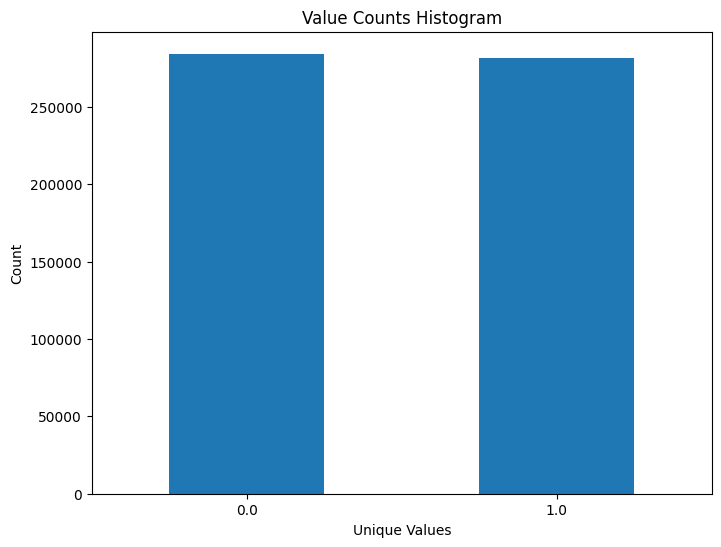

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
y_series = pd.Series(y)
y_series.value_counts().plot(kind='bar', rot=0)

plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Value Counts Histogram')
plt.show()


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

## Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPooling1D, Dropout, Flatten, Dense

model = Sequential()

# Conv1D Layer 1
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

# BatchNormalization 1
model.add(BatchNormalization())

# MaxPool1D 1
model.add(MaxPooling1D(pool_size=2))

# Dropout 1
model.add(Dropout(rate=0.2))

# Conv1D Layer 2
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))

# BatchNormalization 2
model.add(BatchNormalization())

# MaxPool1D 2
model.add(MaxPooling1D(pool_size=2))

# Dropout 2
model.add(Dropout(rate=0.5))

# Flatten
model.add(Flatten())

# Dense 1
model.add(Dense(units=64, activation='relu'))

# Dropout 3
model.add(Dropout(rate=0.5))

# Dense 2
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Assuming you have training data (X_train, y_train) and validation data (X_val, y_val)
epochs = 46

# Train the model
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    validation_data=(X_val, y_val))  # Adjust verbose as needed (0: silent, 1: progress bar, 2: one line per epoch)

Epoch 1/46
7072/7072 [==============================] - 59s 8ms/step - loss: 0.0501 - accuracy: 0.9819 - val_loss: 0.0065 - val_accuracy: 0.9985
Epoch 2/46
7072/7072 [==============================] - 63s 9ms/step - loss: 0.0107 - accuracy: 0.9974 - val_loss: 0.0055 - val_accuracy: 0.9988
Epoch 3/46
7072/7072 [==============================] - 54s 8ms/step - loss: 0.0079 - accuracy: 0.9984 - val_loss: 0.0042 - val_accuracy: 0.9992
Epoch 4/46
7072/7072 [==============================] - 54s 8ms/step - loss: 0.0068 - accuracy: 0.9987 - val_loss: 0.0042 - val_accuracy: 0.9991
Epoch 5/46
7072/7072 [==============================] - 64s 9ms/step - loss: 0.0063 - accuracy: 0.9988 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 6/46
7072/7072 [==============================] - 56s 8ms/step - loss: 0.0055 - accuracy: 0.9990 - val_loss: 0.0033 - val_accuracy: 0.9993
Epoch 7/46
7072/7072 [==============================] - 55s 8ms/step - loss: 0.0051 - accuracy: 0.9991 - val_loss: 0.0031 - val_ac

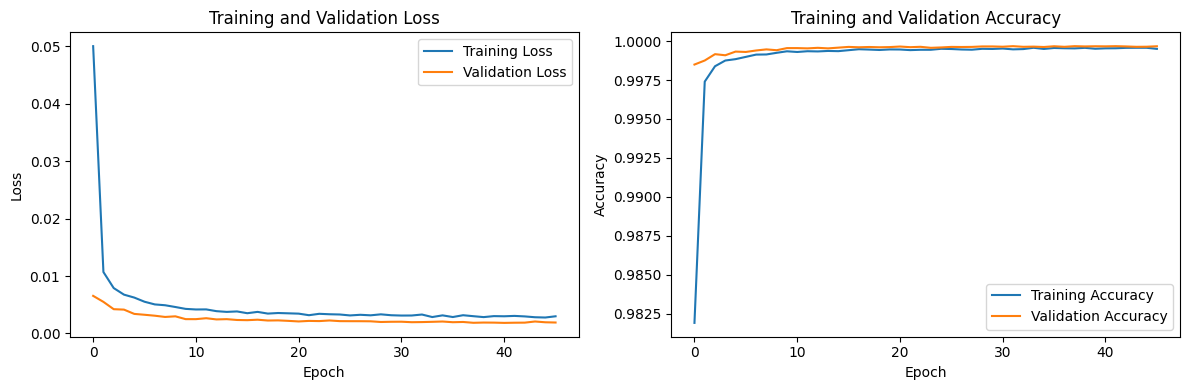

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and have the 'history' object
# history = model.fit(X_train_resampled, y_train_resampled, epochs=epochs, validation_data=(X_val, y_val))

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


5304/5304 [==============================] - 10s 2ms/step


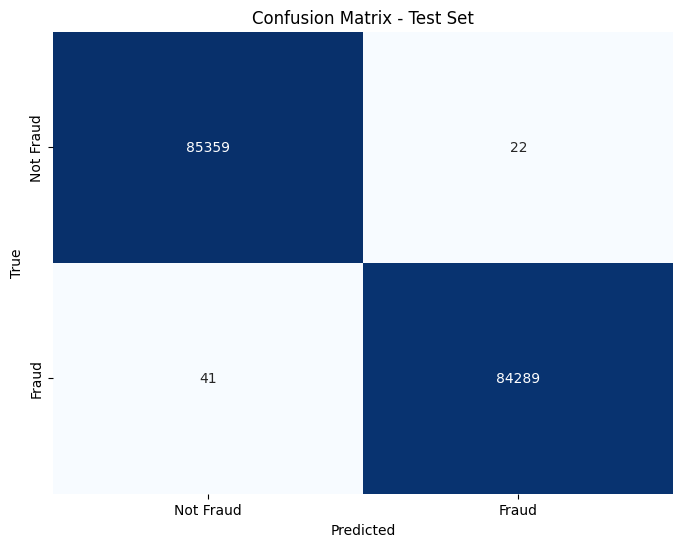

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have trained your model and have the 'model' object
# model.fit(X_train_resampled, y_train_resampled, epochs=epochs, validation_data=(X_val, y_val))

# Assuming you have X_test and y_test
# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_test and y_pred are your true labels and predicted labels, respectively

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.9997390613324477
Recall: 0.9995138147752876
F1-score: 0.9996264253651248


# Using ADASYN without libarary 1

In [ ]:

import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.utils import check_array, check_random_state
from collections import Counter


class ADASYN(object):
    def __init__(self, ratio=0.5, imb_threshold=0.5, k=5, random_state=None, verbose=True):
        self.ratio = ratio
        self.imb_threshold = imb_threshold
        self.k = k
        self.random_state = random_state
        self.verbose = verbose
        self.clstats = {}
        self.num_new = 0
        self.index_new = []

    def fit(self, X, y):
        self.X = check_array(X)
        self.y = np.array(y, dtype=np.int64)
        self.random_state_ = check_random_state(self.random_state)
        self.unique_classes_ = set(self.y)
        self.clstats = Counter(self.y)
        self.maj_class_ = max(self.clstats, key=self.clstats.get)

        if self.verbose:
            print(f'Majority class is {self.maj_class_} and total number of classes is {len(self.unique_classes_)}')

    def transform(self, X, y):
        self.new_X, self.new_y = self.oversample()

    def fit_transform(self, X, y):
        self.fit(X, y)
        self.new_X, self.new_y = self.oversample()
        self.new_X = np.concatenate((self.new_X, self.X), axis=0)
        self.new_y = np.concatenate((self.new_y, self.y), axis=0)
        return self.new_X, self.new_y

    def generate_samples(self, x, knns, knnLabels, cl):
        new_data = []
        new_labels = []

        for ind, elem in enumerate(x):
            min_knns = [ele for index, ele in enumerate(knns[ind][1:-1]) if knnLabels[ind][index + 1] == cl]

            if not min_knns:
                continue

            for _ in range(int(self.gi[ind])):
                randi = self.random_state_.random_integers(0, len(min_knns) - 1)
                l = self.random_state_.random_sample()
                si = self.X[elem] + (self.X[min_knns[randi]] - self.X[elem]) * l

                new_data.append(si)
                new_labels.append(self.y[elem])
                self.num_new += 1

        return np.asarray(new_data), np.asarray(new_labels)

    def oversample(self):
        try:
            self.unique_classes_ = self.unique_classes_
        except AttributeError:
            raise RuntimeError("You need to fit() before applying transform(), or simply fit_transform()")

        int_X = np.zeros([1, self.X.shape[1]])
        int_y = np.zeros([1])

        for cl in self.unique_classes_:
            imb_degree = self.clstats[cl] / self.clstats[self.maj_class_]

            if imb_degree > self.imb_threshold:
                if self.verbose:
                    print(f'Class {cl} is within imbalance threshold')
            else:
                self.G = (self.clstats[self.maj_class_] - self.clstats[cl]) * self.ratio
                self.nearest_neighbors_ = NearestNeighbors(n_neighbors=self.k + 1)
                self.nearest_neighbors_.fit(self.X)
                minx = [ind for ind, exam in enumerate(self.X) if self.y[ind] == cl]
                knn = self.nearest_neighbors_.kneighbors(self.X[minx], return_distance=False)
                knnLabels = self.y[knn.ravel()].reshape(knn.shape)
                tempdi = [Counter(i) for i in knnLabels]
                self.ri = np.array([(sum(i.values()) - i[cl]) / float(self.k) for i in tempdi])

                if np.sum(self.ri):
                    self.ri = self.ri / np.sum(self.ri)

                self.gi = np.rint(self.ri * self.G)
                inter_X, inter_y = self.generate_samples(minx, knn, knnLabels, cl)

                if len(inter_X):
                    int_X = np.concatenate((int_X, inter_X), axis=0)
                if len(inter_y):
                    int_y = np.concatenate((int_y, inter_y), axis=0)

        self.index_new = list(range(self.num_new))
        return int_X[1:], int_y[1:]


In [ ]:
import pandas as pd
df=pd.read_csv("/content/creditcard.csv")

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Use ADASYN to oversample the minority class in the training set
X = df.drop('Class', axis=1)
y = df['Class']

# Use MinMaxScaler for normalization
print("Number of samples in each class before balancing:")
print(y.value_counts())



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
adasyn = ADASYN()
X_train, y_train = adasyn.fit_transform(X_train, y_train)

# Split the temporary set into validation (50%) and final test set (50%)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
# Assuming y_train is a Pandas Series or a NumPy array containing your target variable


# Display the shapes of the sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)
print("Train set shape after resampling:", X_train.shape, y_train.shape)


Number of samples in each class before balancing:
0    284315
1       492
Name: Class, dtype: int64
Majority class is 0 and total number of classes is 2
Class 0 is within imbalance threshold
Train set shape: (120450, 30) (120450,)
Validation set shape: (85443, 30) (85443,)
Test set shape: (85442, 30) (85442,)
Train set shape after resampling: (120450, 30) (120450,)


<ipython-input-7-ca71f58051eb>:50: DeprecationWarning: This function is deprecated. Please call randint(0, 0 + 1) instead
  randi = self.random_state_.random_integers(0, len(min_knns) - 1)
<ipython-input-7-ca71f58051eb>:50: DeprecationWarning: This function is deprecated. Please call randint(0, 2 + 1) instead
  randi = self.random_state_.random_integers(0, len(min_knns) - 1)
<ipython-input-7-ca71f58051eb>:50: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  randi = self.random_state_.random_integers(0, len(min_knns) - 1)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

## Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPooling1D, Dropout, Flatten, Dense

model = Sequential()

# Conv1D Layer 1
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

# BatchNormalization 1
model.add(BatchNormalization())

# MaxPool1D 1
model.add(MaxPooling1D(pool_size=2))

# Dropout 1
model.add(Dropout(rate=0.2))

# Conv1D Layer 2
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))

# BatchNormalization 2
model.add(BatchNormalization())

# MaxPool1D 2
model.add(MaxPooling1D(pool_size=2))

# Dropout 2
model.add(Dropout(rate=0.5))

# Flatten
model.add(Flatten())

# Dense 1
model.add(Dense(units=64, activation='relu'))

# Dropout 3
model.add(Dropout(rate=0.5))

# Dense 2
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Assuming you have training data (X_train, y_train) and validation data (X_val, y_val)
epochs = 46

# Train the model
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    validation_data=(X_val, y_val))  # Adjust verbose as needed (0: silent, 1: progress bar, 2: one line per epoch)

Epoch 1/46
3765/3765 [==============================] - 42s 9ms/step - loss: 0.1329 - accuracy: 0.9500 - val_loss: 0.0094 - val_accuracy: 0.9982
Epoch 2/46
3765/3765 [==============================] - 33s 9ms/step - loss: 0.0167 - accuracy: 0.9957 - val_loss: 0.0074 - val_accuracy: 0.9985
Epoch 3/46
3765/3765 [==============================] - 35s 9ms/step - loss: 0.0110 - accuracy: 0.9976 - val_loss: 0.0072 - val_accuracy: 0.9985
Epoch 4/46
3765/3765 [==============================] - 34s 9ms/step - loss: 0.0088 - accuracy: 0.9982 - val_loss: 0.0060 - val_accuracy: 0.9987
Epoch 5/46
3765/3765 [==============================] - 29s 8ms/step - loss: 0.0087 - accuracy: 0.9984 - val_loss: 0.0058 - val_accuracy: 0.9987
Epoch 6/46
3765/3765 [==============================] - 29s 8ms/step - loss: 0.0080 - accuracy: 0.9986 - val_loss: 0.0052 - val_accuracy: 0.9989
Epoch 7/46
3765/3765 [==============================] - 32s 9ms/step - loss: 0.0071 - accuracy: 0.9988 - val_loss: 0.0046 - val_ac

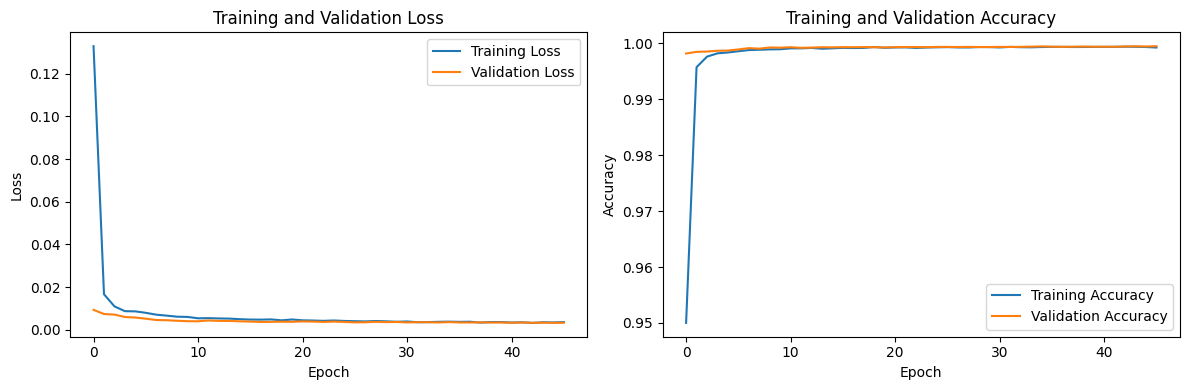

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and have the 'history' object
# history = model.fit(X_train_resampled, y_train_resampled, epochs=epochs, validation_data=(X_val, y_val))

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


2671/2671 [==============================] - 6s 2ms/step


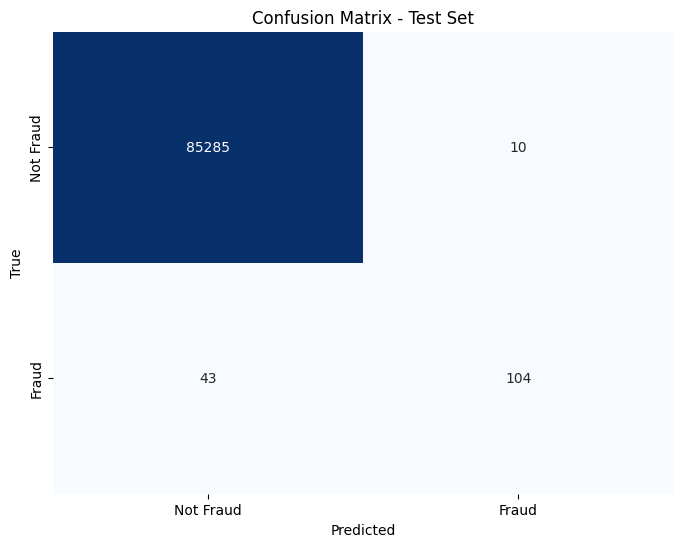

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have trained your model and have the 'model' object
# model.fit(X_train_resampled, y_train_resampled, epochs=epochs, validation_data=(X_val, y_val))

# Assuming you have X_test and y_test
# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.91      0.71      0.80       147

    accuracy                           1.00     85442
   macro avg       0.96      0.85      0.90     85442
weighted avg       1.00      1.00      1.00     85442



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_test and y_pred are your true labels and predicted labels, respectively

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.9122807017543859
Recall: 0.7074829931972789
F1-score: 0.7969348659003831


# Using ADASYN with libarary

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Use ADASYN to oversample the minority class in the training set
X = df.drop('Class', axis=1)
y = df['Class']

# Use MinMaxScaler for normalization
print("Number of samples in each class before balancing:")
print(y.value_counts())

adasyn = ADASYN(sampling_strategy='auto', random_state=42)
X, y = adasyn.fit_resample(X, y)
# Split the data into training (80%) and temporary set (20%)

print("\nNumber of samples in each class after balancing:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Split the temporary set into validation (50%) and final test set (50%)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
# Assuming y_train is a Pandas Series or a NumPy array containing your target variable


# Display the shapes of the sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)
print("Train set shape after resampling:", X_train.shape, y_train.shape)


Number of samples in each class before balancing:
0    284315
1       492
Name: Class, dtype: int64

Number of samples in each class after balancing:
0    284315
1    284298
Name: Class, dtype: int64
Train set shape: (227445, 30) (227445,)
Validation set shape: (170584, 30) (170584,)
Test set shape: (170584, 30) (170584,)
Train set shape after resampling: (227445, 30) (227445,)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

## Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPooling1D, Dropout, Flatten, Dense

model = Sequential()

# Conv1D Layer 1
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

# BatchNormalization 1
model.add(BatchNormalization())

# MaxPool1D 1
model.add(MaxPooling1D(pool_size=2))

# Dropout 1
model.add(Dropout(rate=0.2))

# Conv1D Layer 2
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))

# BatchNormalization 2
model.add(BatchNormalization())

# MaxPool1D 2
model.add(MaxPooling1D(pool_size=2))

# Dropout 2
model.add(Dropout(rate=0.5))

# Flatten
model.add(Flatten())

# Dense 1
model.add(Dense(units=64, activation='relu'))

# Dropout 3
model.add(Dropout(rate=0.5))

# Dense 2
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Assuming you have training data (X_train, y_train) and validation data (X_val, y_val)
epochs = 46

# Train the model
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    validation_data=(X_val, y_val))  # Adjust verbose as needed (0: silent, 1: progress bar, 2: one line per epoch)

Epoch 1/46
7108/7108 [==============================] - 59s 8ms/step - loss: 0.1590 - accuracy: 0.9435 - val_loss: 0.0758 - val_accuracy: 0.9710
Epoch 2/46
7108/7108 [==============================] - 66s 9ms/step - loss: 0.0916 - accuracy: 0.9690 - val_loss: 0.0569 - val_accuracy: 0.9798
Epoch 3/46
7108/7108 [==============================] - 65s 9ms/step - loss: 0.0769 - accuracy: 0.9731 - val_loss: 0.0484 - val_accuracy: 0.9846
Epoch 4/46
7108/7108 [==============================] - 56s 8ms/step - loss: 0.0698 - accuracy: 0.9756 - val_loss: 0.0422 - val_accuracy: 0.9880
Epoch 5/46
7108/7108 [==============================] - 56s 8ms/step - loss: 0.0637 - accuracy: 0.9779 - val_loss: 0.0383 - val_accuracy: 0.9888
Epoch 6/46
7108/7108 [==============================] - 57s 8ms/step - loss: 0.0589 - accuracy: 0.9794 - val_loss: 0.0337 - val_accuracy: 0.9905
Epoch 7/46
7108/7108 [==============================] - 66s 9ms/step - loss: 0.0545 - accuracy: 0.9811 - val_loss: 0.0304 - val_ac

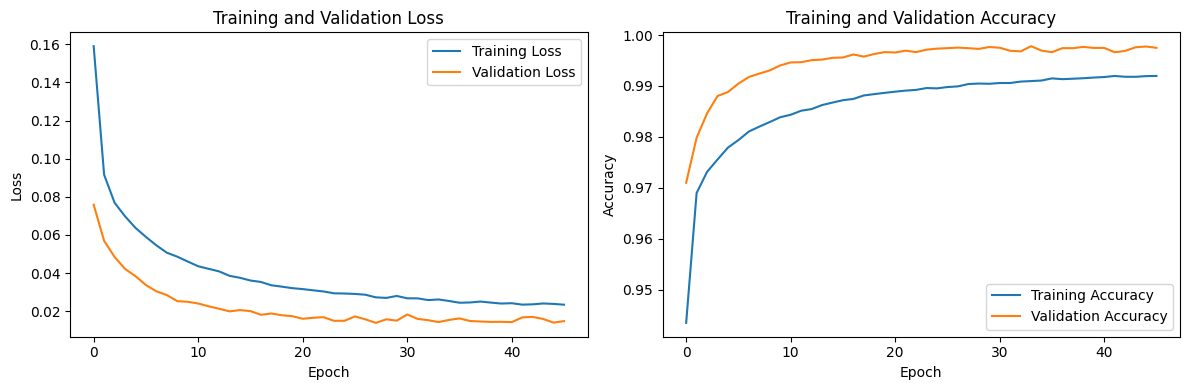

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and have the 'history' object
# history = model.fit(X_train_resampled, y_train_resampled, epochs=epochs, validation_data=(X_val, y_val))

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


5331/5331 [==============================] - 11s 2ms/step


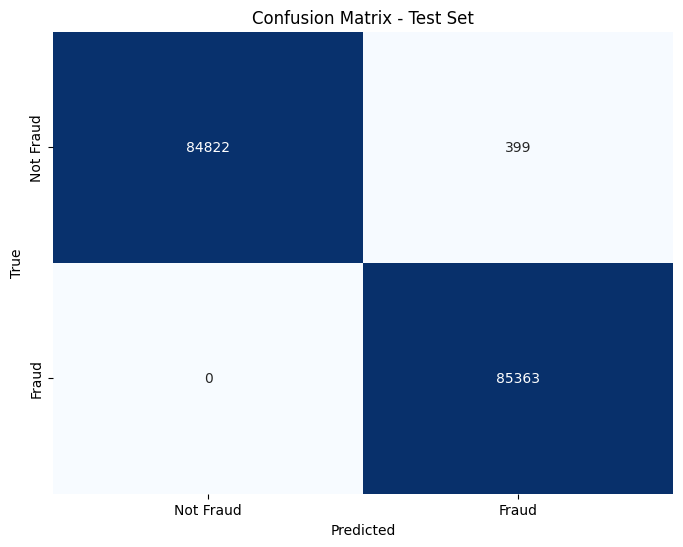

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have trained your model and have the 'model' object
# model.fit(X_train_resampled, y_train_resampled, epochs=epochs, validation_data=(X_val, y_val))

# Assuming you have X_test and y_test
# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85221
           1       1.00      1.00      1.00     85363

    accuracy                           1.00    170584
   macro avg       1.00      1.00      1.00    170584
weighted avg       1.00      1.00      1.00    170584



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_test and y_pred are your true labels and predicted labels, respectively

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.9953475898416548
Recall: 1.0
F1-score: 0.9976683710737765
